## Going Faster with Numba

Calculate the speed of running for each loop for the following function.

In [1]:
from functools import reduce

def poly(n):
    total = 0
    for i in range(n):
        total += 3*n*n - 25*n -4
    
    return total

In [2]:
%timeit -n 10_000 poly(10**3)

603 µs ± 116 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Calculate the speed again, this time with a numba decorator.

In [3]:
import numba

@numba.jit
def poly(n):
    total = 0
    for i in range(n):
        total += 3*n*n - 25*n -4
    
    return total

In [5]:
%timeit -n 10_000 poly(10**3)

The slowest run took 144.99 times longer than the fastest. This could mean that an intermediate result is being cached.
13.9 µs ± 32.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Deep Learning

Import built-in digits dataset from sklearn and predict target values with a Sequential. 

In [8]:
from sklearn.datasets import load_digits

data = load_digits()

In [9]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

target:  0 
image:


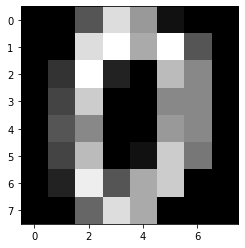

In [15]:
import matplotlib.pyplot as plt 

print('target: ', data.target[0], '\nimage:')
plt.imshow(data.images[0], cmap='gray')

In [20]:
from keras.utils import to_categorical

to_categorical([1, 2, 0, 2, 1])

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [24]:
from sklearn.model_selection import train_test_split

X = data['data']
y = to_categorical(data['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X.shape

(1797, 64)

In [27]:
y.shape

(1797, 10)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

in_dim = X.shape[1]
out_dim = y.shape[1]

model = Sequential([
    Dense(128, input_shape= (in_dim, )),
    Activation('relu'),
    Dense(out_dim),
    Activation('sigmoid')
])

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.8671
Epoch 2/10
45/45 [==============================] - 0s 3ms/step - loss: 0.2347 - accuracy: 0.9297
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9562
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.9722
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9812
Epoch 6/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0734 - accuracy: 0.9847
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9903
Epoch 8/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9937
Epoch 9/10
45/45 [==============================] - 0s 6ms/step - loss: 0.0380 - accuracy: 0.9951
Epoch 10/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9951


In [53]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 0.9722


[0.11021451652050018, 0.9722222089767456]

Classification report.

In [70]:
from sklearn.metrics import classification_report

pred = model.predict(X_test).argmax(axis=1)
print(classification_report(model.predict(X_test).argmax(axis=1), y_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.98      0.98      0.98        41
           2       1.00      1.00      1.00        32
           3       0.97      0.97      0.97        37
           4       1.00      0.95      0.97        39
           5       0.96      0.96      0.96        25
           6       0.98      1.00      0.99        42
           7       1.00      0.98      0.99        44
           8       0.90      0.95      0.92        39
           9       0.97      0.97      0.97        31

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [63]:
model.predict(X_test[:3]).argmax(axis=1)

array([2, 2, 1], dtype=int64)

In [65]:
y_test[:3].argmax(axis=1)

array([2, 2, 1], dtype=int64)

Save the model as a h5 file.

In [66]:
model.save('digits.h5')

Recall the model, and its attributes.

In [68]:
from tensorflow.keras.models import load_model

model2 = load_model('digits.h5')
model2.predict(X_test[:3]).argmax(axis=1)

array([2, 2, 1], dtype=int64)

## Image Processing with OpenCV

In [77]:
pip install opencv-python

In [1]:
import cv2

img = cv2.imread(r'C:\Users\Lenovo\Desktop\Robert.jpg')

In [2]:
img.shape

(1800, 1440, 3)

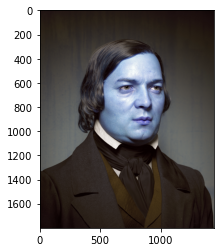

In [3]:
import matplotlib.pyplot as plt 

plt.imshow(img)

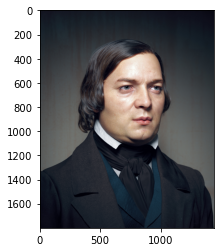

In [4]:
import matplotlib.pyplot as plt 

# as cv2 stores image pixels as bgr instead of rgb, take the inverse of the last column.
plt.imshow(img[:, :, ::-1])

Alternatively, we could use built-in transorfmation in cv2.

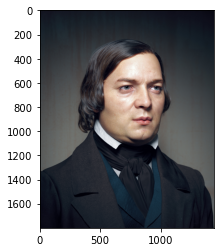

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Find edges in the image.

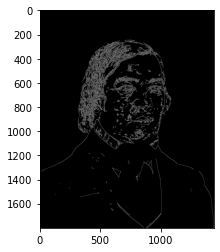

In [6]:
edges = cv2.Canny(img, 60, 180)
plt.imshow(edges, cmap='gray')

## NLP with spacy

In [8]:
text = '''Backgammon is one of the oldest known board games. Its history can betraced back nearly 5,000 years to archeological
discoveries in the Middle East. It is a two player game where each player has fifteen checkers which move between 
twenty-fourpoints according to the roll of two dice.
'''

In [9]:
import spacy

In [10]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
doc

Backgammon is one of the oldest known board games. Its history can betraced back nearly 5,000 years to archeological
discoveries in the Middle East. It is a two player game where each player has fifteen checkers which move between 
twenty-fourpoints according to the roll of two dice.

In [11]:
type(doc)

spacy.tokens.doc.Doc

Retrieve the first sentence.

In [12]:
sent = list(doc.sents)[0]
sent

Backgammon is one of the oldest known board games.

Get the tokens with their tags.

In [13]:
for tok in sent:
    print(f'{tok.text!r} -> {tok.tag_}')

'Backgammon' -> NNP
'is' -> VBZ
'one' -> CD
'of' -> IN
'the' -> DT
'oldest' -> RBS
'known' -> VBN
'board' -> NN
'games' -> NNS
'.' -> .


Pull the entities from the text.

In [14]:
for ent in doc.ents:
    print(f'{ent.text} {ent.label_}')

one CARDINAL
nearly 5,000 years DATE
the Middle East LOC
two CARDINAL
fifteen CARDINAL
twenty CARDINAL
two CARDINAL
